In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [6]:
X = X.reshape(-1,1)

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [8]:
y = y.reshape(-1,1)
y = minmax.fit_transform(y)

In [9]:
X[:5]

array([[0.88406512],
       [0.50222003],
       [0.7602368 ],
       [0.52146029],
       [0.71879625]])

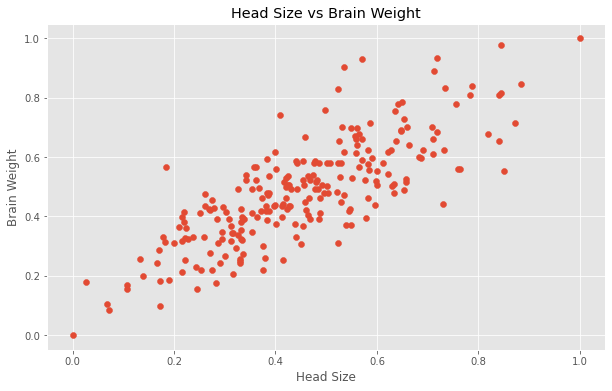

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title('Head Size vs Brain Weight')
plt.show()

In [11]:
n = len(X)
def cost_function(x,y,slope,inter):
    error = (np.sum((slope * x + inter) - y) ** 2) / n
    return error

In [12]:
cost_function(X,y,0,0)

55.09890094608208

In [15]:
def gradient_descent(x,y,epochs,alpha):
    cost_history = []
    slope = 0
    inter = 0
    for i in range(epochs):
        y_pred = slope * x + inter
        loss = y_pred - y
        slope_grad = (2/n) * np.dot(loss.T,x)
        inter_grad = (2/n) * np.sum(loss)
        slope = slope - slope_grad * alpha
        inter = inter - inter_grad * alpha
        cost_history.append(cost_function(x,y,slope, inter))
    return slope, inter, cost_history

In [104]:
epochs = 10000
alpha = 0.01
slope, inter, cost = gradient_descent(X,y,epochs,alpha)

In [105]:
slope, inter

(array([[0.78241646]]), 0.12940368086748405)

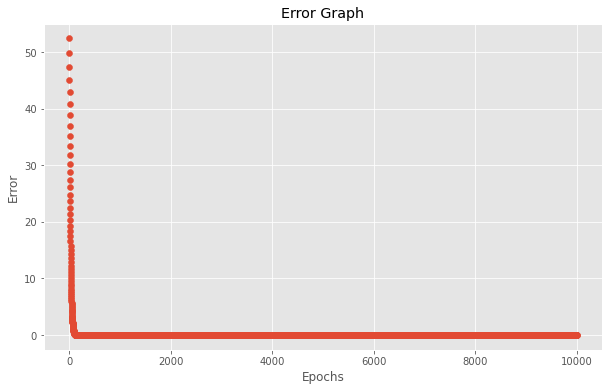

In [106]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(np.arange(epochs), cost)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Graph')
plt.show()

In [107]:
cost[-1]

2.9258142635909965e-07

In [108]:
predictions = []
for i in range(n):
    pred = slope[0] * X[i] + inter
    predictions.append(pred)

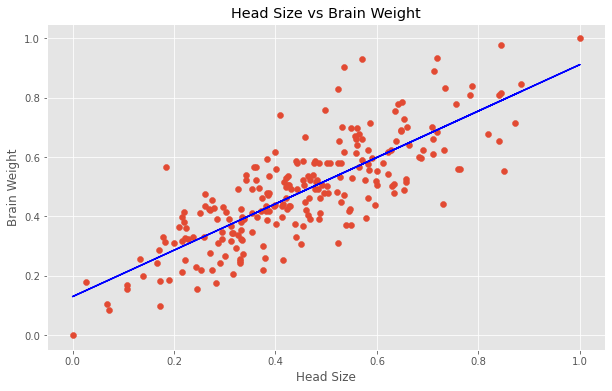

In [109]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, predictions, 'blue')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title('Head Size vs Brain Weight')
plt.show()